In [1]:
import pandas as pd
import os 
import shutil
from tqdm import tqdm
import cv2
from matplotlib import pyplot as plt

In [2]:
##convert dataset into coco format
#read all the train values

train_label_data_pth='data/fall_dataset/labels/train'
train_image_data_pth='data/fall_dataset/images/train'
train_test_labels_format=[]
for txt in tqdm(os.listdir(train_label_data_pth)):
    labels=open(os.path.join(train_label_data_pth,txt),'r').read()
    labels=labels.split('\n')
    img_name=txt[:-4]+'.jpg'
    img=cv2.imread(os.path.join(train_image_data_pth,img_name))
    img_h=len(img)
    img_w=len(img[0])
    for label in labels:
        label=label.split(' ')
        
        cat=int(label[0])
        x_mid=float(label[1])
        y_mid=float(label[2])
        width=float(label[3])
        height=float(label[4])
        x=int((x_mid-width/2)*img_w)
        y=int((y_mid-height/2)*img_h)
        width=int(width*img_w)
        height=int(height*img_h)
        train_test_labels_format.append([img_name,cat,x,y,width,height,img_w,img_h])
        
## append all the data from val too
val_label_data_pth='data/fall_dataset/labels/val'
val_image_data_pth='data/fall_dataset/images/val'
val_labels_format=[]
for txt in tqdm(os.listdir(val_label_data_pth)):
    labels=open(os.path.join(val_label_data_pth,txt),'r').read()
    labels=labels.split('\n')
    img_name=txt[:-4]+'.jpg'
    img=cv2.imread(os.path.join(val_image_data_pth,img_name))
    img_h=len(img)
    img_w=len(img[0])
    for label in labels:
        label=label.split(' ')
        
        cat=int(label[0])
        x_mid=float(label[1])
        y_mid=float(label[2])
        width=float(label[3])
        height=float(label[4])
        x=int((x_mid-width/2)*img_w)
        y=int((y_mid-height/2)*img_h)
        width=int(width*img_w)
        height=int(height*img_h)
        val_labels_format.append([img_name,cat,x,y,width,height,img_w,img_h])
        
        


100%|█████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 264.15it/s]


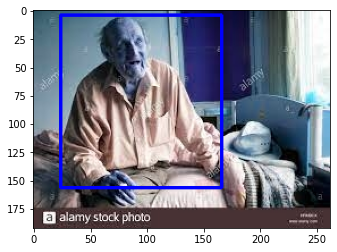

In [3]:
##for labels
img=cv2.imread('data/fall_dataset/images/train/not fallen132.jpg')

##images are labeled in the format: class, x-coord , y-coord , width, height
label=[2, 0.364869, 0.475571, 0.543988, 0.905437]
x=label[1]
y=label[2]
width=label[3]
height=label[4]
height_img=len(img)
width_img=len(img[0])
x1,x2=int((x-width/2)*width_img),int((x+width/2)*width_img)
y1,y2=int((y-height/2)*height_img),int((x+height/2)*height_img)

cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.imshow(img)

In [4]:
## converting all format to coco
df_traintest=pd.DataFrame(train_test_labels_format,columns=['File Name','Class ID','X','Y','Width','Height','Image Width','Image Height'])
df_val=pd.DataFrame(val_labels_format,columns=['File Name','Class ID','X','Y','Width','Height','Image Width','Image Height'])
#df_traintest
#temp_df=df_traintest[df_traintest['File Name']=='fall001.jpg']
#temp_df
df_traintest

,File Name,Class ID,X,Y,Width,Height,Image Width,Image Height
0,fall001.jpg,0,78,78,122,44,275,183
1,fall002.jpg,0,112,59,65,59,259,194
2,fall003.jpg,0,47,64,208,78,275,183
3,fall004.jpg,0,15,2,257,132,275,183
4,fall005.jpg,0,14,3,242,165,275,183
...,...,...,...,...,...,...,...,...
448,not fallen162.jpg,1,390,170,114,309,640,480
449,not fallen163.jpg,1,385,168,113,311,640,480
450,not fallen164.jpg,1,124,168,112,310,640,480
451,not fallen165.jpg,1,333,173,99,215,640,480


In [5]:
##train test splits for df_train_test
from sklearn.model_selection import train_test_split as tts
df_train,df_test=tts(df_traintest,test_size=100/453,random_state=42)

In [6]:
file_list=df_traintest['File Name'].unique().tolist()+df_val['File Name'].unique().tolist()
file_dict={}
for idx,file_name in enumerate(file_list):
    file_dict[file_name]=idx
file_dict

{'fall001.jpg': 374,
 'fall002.jpg': 375,
 'fall003.jpg': 376,
 'fall004.jpg': 377,
 'fall005.jpg': 378,
 'fall006.jpg': 379,
 'fall007.jpg': 380,
 'fall008.jpg': 381,
 'fall009.jpg': 382,
 'fall010.jpg': 383,
 'fall011.jpg': 384,
 'fall012.jpg': 385,
 'fall013.jpg': 386,
 'fall014.jpg': 387,
 'fall015.jpg': 388,
 'fall016.jpg': 389,
 'fall017.jpg': 390,
 'fall018.jpg': 391,
 'fall019.jpg': 392,
 'fall020.jpg': 393,
 'fall021.jpg': 394,
 'fall022.jpg': 395,
 'fall023.jpg': 396,
 'fall024.jpg': 397,
 'fall025.jpg': 398,
 'fall026.jpg': 399,
 'fall027.jpg': 400,
 'fall028.jpg': 401,
 'fall029.jpg': 402,
 'fall030.jpg': 403,
 'fall031.jpg': 404,
 'fall032.jpg': 405,
 'fall033.jpg': 406,
 'fall034.jpg': 407,
 'fall035.jpg': 408,
 'fall036.jpg': 409,
 'fall037.jpg': 410,
 'fall038.jpg': 411,
 'fall039.jpg': 412,
 'fall040.jpg': 413,
 'fall041.jpg': 414,
 'fall042.jpg': 415,
 'fall043.jpg': 416,
 'fall044.jpg': 417,
 'fall045.jpg': 418,
 'fall046.jpg': 419,
 'fall047.jpg': 420,
 'fall048.jpg

In [7]:
## functions to add to coco dataset
import cv2
def add_image(image_fol,df):
    image_json=[]
    image_list=df['File Name'].unique()
    for img_name in image_list:
        temp_df=df[df['File Name']==img_name].copy()
        image={}
        image['file_name']=img_name
        image['height']=temp_df['Image Height'].tolist()[0]
        image['width']=temp_df['Image Width'].tolist()[0]
        image['id']=file_dict[img_name]
        image_json.append(image)
    
    return image_json

def add_annotations(df):
    annotations=[]
    x=df.X.tolist()
    y=df.Y.tolist()
    width=df.Width.tolist()
    height=df.Height.tolist()
    cat=df['Class ID'].tolist()
    image=df['File Name'].tolist()
    
    for i in range(len(x)):
        labels={}
        labels['iscrowd']=0
        labels['id']=i
        labels['category_id']=cat[i]
        labels['image_id']=file_dict[image[i]]
        labels['area']=width[i]*height[i]
        labels['bbox']=[x[i],y[i],width[i],height[i]]
        annotations.append(labels)
    return annotations

def add_categories(cat_dict):
    categories=[]
    for key in cat_dict.keys():
        item={}
        item['supercategory']='Humans'
        item['id']=int(key)
        item['name']=cat_dict[key]
        categories.append(item)
    
    return categories

def coco_dataset(image_fol,df,cat_dict):
    coco={}
    
    info_dict={}
    info_dict['description']='Falling dataset'
    info_dict['url']=''
    info_dict['version']=''
    info_dict['year']=''
    info_dict['contributor']='UTTEJ KUMAR KANDAGATLA'
    info_dict['data_created']='17/03/2022'
    coco['info']=info_dict
    
    coco['images']=add_image(image_fol,df)
    coco['annotations']=add_annotations(df)
    coco['categories']=add_categories(cat_dict)
    
    return coco

#categories
cat_dict={
    '0':'Fallen',
    '1':'Walking',
    '2':'Sitting',   
}

folder='C:/Users/jxwon/Documents/Uni/CS3244/Project/'
#coco_data=coco_dataset(folder,data_df,cat_dict)

In [8]:
##conversion to different format
import json

folder='C:/Users/jxwon/Documents/Uni/CS3244/Project/'
path ='C:/Users/jxwon/Documents/Uni/CS3244/Project/data/fall_dataset/coco labels/'


coco_train=coco_dataset(folder,df_train,cat_dict)
coco_test=coco_dataset(folder,df_test,cat_dict)
coco_val=coco_dataset(folder,df_val,cat_dict)

train_json= json.dumps(coco_train)
test_json= json.dumps(coco_test)
val_json= json.dumps(coco_val)

In [9]:
##saving into a coco json file
with open(path+'train.json','w') as json_file:
    json_file.write(train_json)
with open(path+'test.json','w') as json_file:
    json_file.write(test_json)    
with open(path+'val.json','w') as json_file:
    json_file.write(val_json)

In [10]:
# to copy images to different folders
import shutil
from tqdm import tqdm
def image_copy(main_fol,img_list,target_dir):
    for img in tqdm(img_list):
        shutil.copy(main_fol+img,target_dir+img)

In [11]:
train_fol='C:/Users/jxwon/Documents/Uni/CS3244/Project/data/fall_dataset/images/train/'
test_fol='C:/Users/jxwon/Documents/Uni/CS3244/Project/data/fall_dataset/images/train/'
val_fol='C:/Users/jxwon/Documents/Uni/CS3244/Project/data/fall_dataset/images/val/'

train_path='C:/Users/jxwon/Documents/Uni/CS3244/Project/data/fall_dataset/coco images/train/'
test_path='C:/Users/jxwon/Documents/Uni/CS3244/Project/data/fall_dataset/coco images/test/'
val_path='C:/Users/jxwon/Documents/Uni/CS3244/Project/data/fall_dataset/coco images/val/'

train_img_list=df_train['File Name'].unique()
test_img_list=df_test['File Name'].unique()
val_img_list=df_val['File Name'].unique()

image_copy(train_fol,train_img_list,train_path)
image_copy(test_fol,test_img_list,test_path)
image_copy(val_fol,val_img_list,val_path)

100%|████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 1441.21it/s]
